# Convolutional Neural Network (CNN)

1. БАЗА: Convolutional Neural Network (CNN)
Основные этапы:
- Conv2D — извлечение локальных признаков (фильтры, ядро, stride, padding).
- Activation (ReLU) — нелинейность.
- Pooling (MaxPooling2D) — уменьшение размерности, инвариантность.
- Dropout — регуляризация.
- Flatten / Dense — классификация.
2. Ключевые функции и классы Keras
- tf.keras.layers.Conv2D
- tf.keras.layers.MaxPooling2D
- tf.keras.layers.ReLU
- tf.keras.layers.BatchNormalization
- tf.keras.layers.Dropout
- tf.keras.layers.Dense
- tf.keras.Model или tf.keras.Sequential

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Loading MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


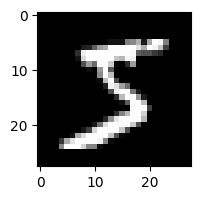

((10000, 28, 28, 1),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06666667, 0.25882353, 0.05490196, 0.2627451 ,
        0.2627451 , 0.2627451 , 0.23137255, 0.08235294, 0.9254902 ,
        0.99607843, 0.41568627, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]))

In [20]:
# Visualisation de donne
fig = plt.figure(figsize=(2, 2))
plt.imshow(x_train[0], cmap='gray')
plt.show()

x_test.shape, x_test[0, 10, :, 0]

In [11]:
# Model CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


d:\Programmation\Formation\Simplon\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Training
history = model.fit(x_train, y_train, epochs=3, validation_split=0.1)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9554 - loss: 0.1461 - val_accuracy: 0.9883 - val_loss: 0.0400
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9858 - loss: 0.0460 - val_accuracy: 0.9883 - val_loss: 0.0377
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9900 - loss: 0.0312 - val_accuracy: 0.9895 - val_loss: 0.0374


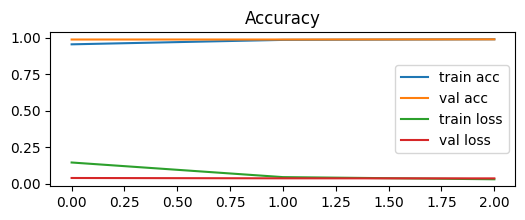

In [ ]:
# Visualisation

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Accuracy")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


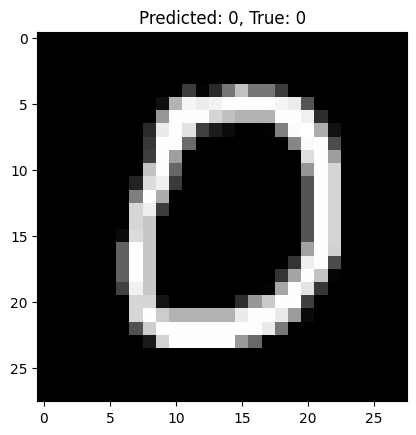

In [19]:
# Prévision et visualisation des résultats
idx = 10
img = x_test[idx]

pred = model.predict(img[np.newaxis,...])
pred_class = np.argmax(pred)

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {pred_class}, True: {y_test[idx]}")
plt.show()
